In [1]:
!pip install pycaret

Processing c:\users\savil\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866\cufflinks-0.17.3-py3-none-any.whl
  Using cached kmodes-0.10.2-py2.py3-none-any.whl (18 kB)
  Using cached yellowbrick-1.2-py3-none-any.whl (269 kB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached pyLDAvis-2.1.2.tar.gz (1.6 MB)
  Using cached pandas_profiling-2.9.0-py2.py3-none-any.whl (258 kB)
  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
  Using cached plotly-4.14.1-py2.py3-none-any.whl (13.2 MB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Using cached plac-1.1.3-py2.py3-none-any.whl (20 kB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached wasabi-0.8.0-py3-none-any.whl (23 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
Processing c:\users\savil\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("Documents/Countries.csv", encoding='latin-1')
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [10]:
import pycaret.clustering as pc

In [11]:
dir(pc)

['Any',
 'Dict',
 'Display',
 'List',
 'MLUsecase',
 'Optional',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_metric',
 'assign_model',
 'create_model',
 'datetime',
 'deploy_model',
 'enable_colab',
 'evaluate_model',
 'get_clusters',
 'get_config',
 'get_logger',
 'get_logs',
 'get_metrics',
 'ipw',
 'is_in_colab',
 'load_config',
 'load_model',
 'models',
 'np',
 'pd',
 'plot_model',
 'predict_model',
 'pull',
 'pycaret',
 'remove_metric',
 'save_config',
 'save_model',
 'set_config',
 'setup',
 'sys',
 'time',
 'tune_model',
 'warnings']

## Segment the countries by clustering

In [13]:
cls = pc.setup(df, ignore_features = ['country', 'name'])

,Description,Value
0,session_id,7715
1,Original Data,"(245, 4)"
2,Missing Values,True
3,Numeric Features,2
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(245, 2)"
9,CPU Jobs,-1


In [14]:
# K means clustering model
km = pc.create_model('kmeans', num_clusters = 7)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4689,420.3668,0.6592,0,0,0


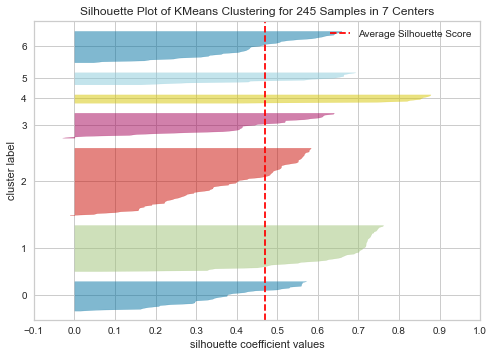

In [17]:
# Finding appropriate Cluster number
pc.plot_model(km, plot = 'silhouette')

In [18]:
pc.plot_model(km, plot = 'cluster')

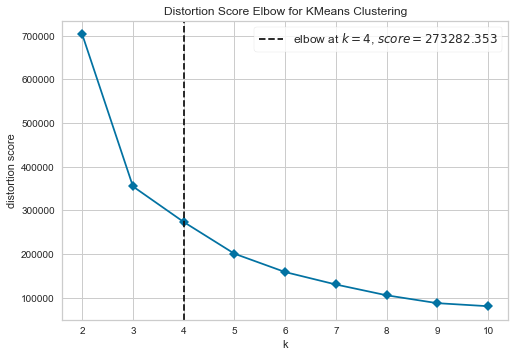

In [19]:
pc.plot_model(km, plot = 'elbow')

In [20]:
pc.plot_model(km, plot = 'tsne')

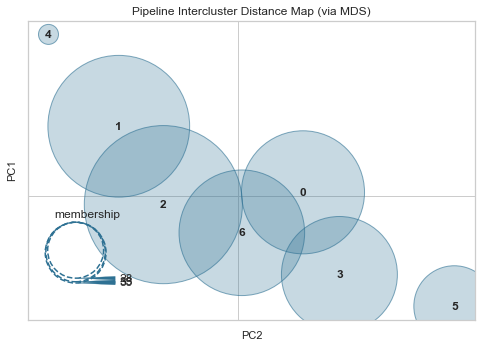

In [21]:
pc.plot_model(km, plot = 'distance')

In [22]:
pc.plot_model(km, plot = 'distribution')

In [23]:
#Assigning Clusters to countries
km_df = pc.assign_model(km)

In [24]:
km_df.head()

,country,latitude,longitude,name,Cluster
0,AD,42.546245,1.601554,Andorra,Cluster 2
1,AE,23.424076,53.847818,United Arab Emirates,Cluster 6
2,AF,33.939110,67.709953,Afghanistan,Cluster 6
3,AG,17.060816,-61.796428,Antigua and Barbuda,Cluster 1
4,AI,18.220554,-63.068615,Anguilla,Cluster 1


In [25]:
km_df2 = km_df.copy()

In [26]:
km_df2['Cluster'] = km_df2['Cluster'].str.replace('Cluster','').apply(int)

In [27]:
km_df2.head()

,country,latitude,longitude,name,Cluster
0,AD,42.546245,1.601554,Andorra,2
1,AE,23.424076,53.847818,United Arab Emirates,6
2,AF,33.939110,67.709953,Afghanistan,6
3,AG,17.060816,-61.796428,Antigua and Barbuda,1
4,AI,18.220554,-63.068615,Anguilla,1


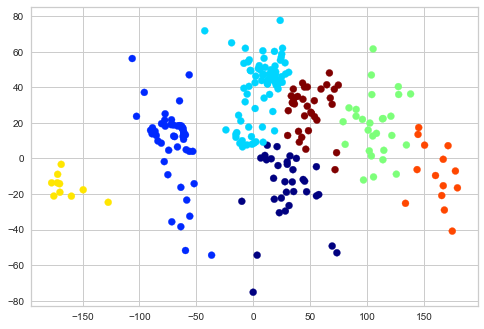

In [32]:
#Plot the clusters
plt.scatter(km_df2['longitude'],km_df2['latitude'], c = km_df2['Cluster'], cmap = 'jet')

In [33]:
!pip install geopandas descartes

  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\savil\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\savil\\AppData\\Local\\Temp\\pip-install-n6p0oqa5\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\savil\\AppData\\Local\\Temp\\pip-install-n6p0oqa5\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\savil\AppData\Local\Temp\pip-pip-egg-info-wjg1lgxo'
         cwd: C:\Users\savil\AppData\Local\Temp\pip-install-n6p0oqa5\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command out

## Need to fix Gdal error within machine before continuing this project